In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, root_mean_squared_error as rmse
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('ML_FinalProject/Airbnb_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              74111 non-null  int64  
 1   id                      74111 non-null  int64  
 2   log_price               74111 non-null  float64
 3   property_type           74111 non-null  object 
 4   room_type               74111 non-null  object 
 5   amenities               74111 non-null  object 
 6   accommodates            74111 non-null  int64  
 7   bathrooms               73911 non-null  float64
 8   bed_type                74111 non-null  object 
 9   cancellation_policy     74111 non-null  object 
 10  cleaning_fee            74111 non-null  bool   
 11  city                    74111 non-null  object 
 12  description             74111 non-null  object 
 13  first_review            58247 non-null  object 
 14  host_has_profile_pic    73923 non-null

In [4]:
len(df)

74111

In [5]:
df.isnull().sum()

Unnamed: 0                    0
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [6]:
df.drop(['Unnamed: 0', 'id', 'thumbnail_url', 'latitude', 'longitude', 'name', 'description', 'first_review', 'last_review'], axis = 1, inplace = True)

In [7]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_identity_verified,host_response_rate,host_since,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,t,NaN,26-03-2012,f,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,f,100%,19-06-2017,t,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,t,100%,25-10-2016,t,Harlem,10,92.0,10027,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,t,NaN,19-04-2015,f,Lower Haight,0,NaN,94117,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,t,100%,01-03-2015,t,Columbia Heights,4,40.0,20009,0.0,1.0


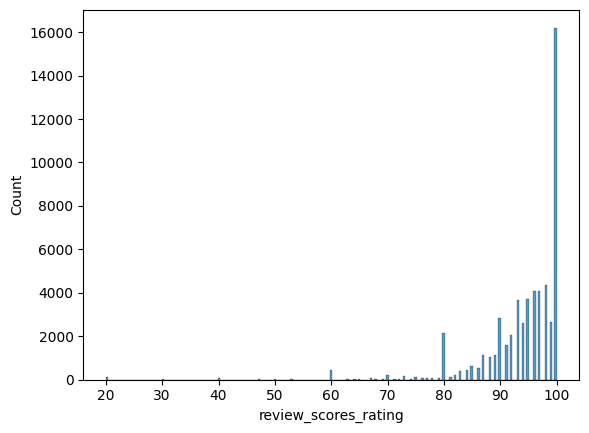

In [8]:
sns.histplot(df['review_scores_rating'])
plt.show()

In [9]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
df['host_response_rate']

0        NaN
1        100
2        100
3        NaN
4        100
        ... 
74106    NaN
74107    100
74108    100
74109    100
74110    100
Name: host_response_rate, Length: 74111, dtype: object

##### we drop first_review and last_review null values
##### drop null values under zipcode and then for the null values under nieghbourhood we map the neighbourhood to its corresponding zipcode 
##### take mean value of review scores to fill null values 
##### take median values for beds, bathrooms, bedrooms
##### take mean value for host response rate,
##### drop null values for host_since
##### fill 'f' for the host_has_profile_pic and host_is_verified columns for the null values

In [10]:
df.dropna(subset = ['zipcode', 'host_since'], inplace = True)

df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace = True)
df['review_scores_rating'] = pd.to_numeric(df['review_scores_rating'], errors='coerce')

df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace = True)

df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)

df['host_has_profile_pic'].fillna('f', inplace = True)
df['host_identity_verified'].fillna('f', inplace = True)

/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_33811/4261230609.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace = True)
/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_33811/4261230609.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [11]:
df['host_response_rate']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
74106    100.0
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 72957, dtype: float64

In [12]:
df.isnull().sum()

log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_has_profile_pic         0
host_identity_verified       0
host_response_rate           0
host_since                   0
instant_bookable             0
neighbourhood             6480
number_of_reviews            0
review_scores_rating         0
zipcode                      0
bedrooms                     0
beds                         0
dtype: int64

In [13]:
zipcode_dict = df.groupby('zipcode')['neighbourhood'].apply(list).to_dict()

list_of_dicts = []

for zipcode, neighbourhoods in zipcode_dict.items():
    neighbourhood_count = {}
    for neighbourhood in set(neighbourhoods):  # Remove duplicates
        neighbourhood_count[neighbourhood] = neighbourhoods.count(neighbourhood)  # Count occurrences
    zipcode_dict[zipcode] = neighbourhood_count



def most_popular_neighbourhood(missing_zipcode):
    neighbourhood_dict = zipcode_dict[missing_zipcode]
    max_key = max(neighbourhood_dict, key=neighbourhood_dict.get)  
    return max_key


# now for the missing values we fill in the most popular neighbourhood in that zipcode
def fill_neighbourhood(row):
    if pd.isna(row['neighbourhood']):
        return most_popular_neighbourhood(row['zipcode'])  # Your function
    return row['neighbourhood']

df['neighbourhood'] = df.apply(fill_neighbourhood, axis=1)

In [14]:
df.isnull().sum()

log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_has_profile_pic         0
host_identity_verified       0
host_response_rate           0
host_since                   0
instant_bookable             0
neighbourhood             1374
number_of_reviews            0
review_scores_rating         0
zipcode                      0
bedrooms                     0
beds                         0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

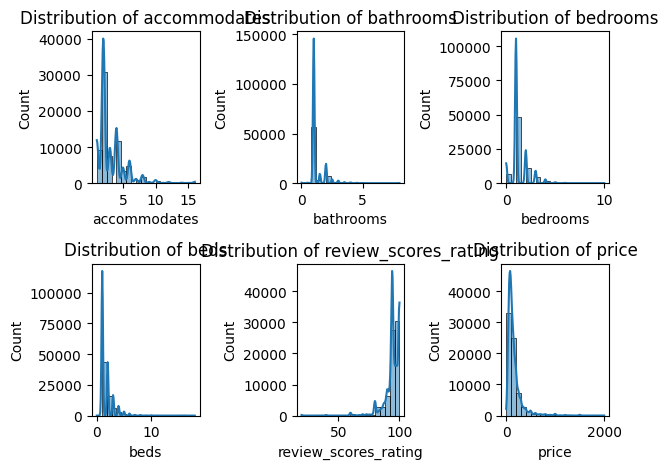

In [39]:
# distribution of 
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'price']

# Set up the grid dimensions
n_features = len(numerical_features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde = True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Turn off extra axes if there are more subplots than features
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
# creating a host tenure column after which we drop the host_since column 
import datetime
today = datetime.datetime.today()
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_experience'] = np.ceil((today - df['host_since']).dt.days/365.25)
df['host_experience']

/var/folders/pt/m45tcz0n18zgj8vt3kqn08qh0000gn/T/ipykernel_33811/2249705540.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'])


0        13.0
1         8.0
2         9.0
3        10.0
4        11.0
         ... 
74106    12.0
74107     9.0
74108    14.0
74109     8.0
74110    13.0
Name: host_experience, Length: 71583, dtype: float64

In [18]:
df['price'] = np.exp(df['log_price'])

In [19]:
df['cleaning_fee'] = df['cleaning_fee'].astype('str').map({'True': 't', 'False': 'f'})
for col in ['host_identity_verified', 'instant_bookable', 'cleaning_fee', 'host_has_profile_pic']:
    df[col] = df[col].map({'t':1, 'f':0})
df['cancellation_policy'] = df['cancellation_policy'].map({'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict': 3})

In [20]:
t_f_mapping = {'t': 1, 'f': 0}
cancellation_mapping = {'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict': 3}

In [21]:
number_of_amenities = []
df['amenities'] = df['amenities'].astype('str')

def amenities_count(amenities):
    amenities_list = amenities.replace('"', '').replace("{", '').replace("}",'').split(',')
    return len(amenities_list)

df['amenities'] = df['amenities'].apply(amenities_count)

In [22]:
df.drop(['log_price', 'host_since'], axis = 1, inplace = True)

In [23]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_experience,price
0,Apartment,Entire home/apt,9,3,1.0,Real Bed,2.0,1,NYC,1,...,100.0,0,Brooklyn Heights,2,100.000000,11201,1.0,1.0,13.0,150.0
1,Apartment,Entire home/apt,15,7,1.0,Real Bed,2.0,1,NYC,1,...,100.0,1,Hell's Kitchen,6,93.000000,10019,3.0,3.0,8.0,169.0
2,Apartment,Entire home/apt,19,5,1.0,Real Bed,1.0,1,NYC,1,...,100.0,1,Harlem,10,92.000000,10027,1.0,3.0,9.0,145.0
3,House,Entire home/apt,15,4,1.0,Real Bed,0.0,1,SF,1,...,100.0,0,Lower Haight,0,94.064273,94117,2.0,2.0,10.0,750.0
4,Apartment,Entire home/apt,12,2,1.0,Real Bed,1.0,1,DC,1,...,100.0,1,Columbia Heights,4,40.000000,20009,0.0,1.0,11.0,115.0


In [24]:
df.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds',
       'host_experience', 'price'],
      dtype='object')

In [25]:
# label encoding property_type, room_type, bed_type, neighbourhood
encoders = {}
for col in ['property_type', 'room_type', 'bed_type', 'neighbourhood', 'city']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [26]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_experience,price
0,0,0,9,3,1.0,4,2.0,1,4,1,...,100.0,0,76,2,100.000000,11201,1.0,1.0,13.0,150.0
1,0,0,15,7,1.0,4,2.0,1,4,1,...,100.0,1,251,6,93.000000,10019,3.0,3.0,8.0,169.0
2,0,0,19,5,1.0,4,1.0,1,4,1,...,100.0,1,246,10,92.000000,10027,1.0,3.0,9.0,145.0
3,17,0,15,4,1.0,4,0.0,1,5,1,...,100.0,0,324,0,94.064273,94117,2.0,2.0,10.0,750.0
4,0,0,12,2,1.0,4,1.0,1,2,1,...,100.0,1,118,4,40.000000,20009,0.0,1.0,11.0,115.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71583 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           71583 non-null  int64  
 1   room_type               71583 non-null  int64  
 2   amenities               71583 non-null  int64  
 3   accommodates            71583 non-null  int64  
 4   bathrooms               71583 non-null  float64
 5   bed_type                71583 non-null  int64  
 6   cancellation_policy     71457 non-null  float64
 7   cleaning_fee            71583 non-null  int64  
 8   city                    71583 non-null  int64  
 9   host_has_profile_pic    71583 non-null  int64  
 10  host_identity_verified  71583 non-null  int64  
 11  host_response_rate      71583 non-null  float64
 12  instant_bookable        71583 non-null  int64  
 13  neighbourhood           71583 non-null  int64  
 14  number_of_reviews       71583 non-null  int

In [28]:
df['zipcode'] = df['zipcode'].astype(str).str[:5]
df.drop(index=df[df['zipcode'] == '1m'].index, inplace=True)

df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71582 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           71582 non-null  int64  
 1   room_type               71582 non-null  int64  
 2   amenities               71582 non-null  int64  
 3   accommodates            71582 non-null  int64  
 4   bathrooms               71582 non-null  float64
 5   bed_type                71582 non-null  int64  
 6   cancellation_policy     71456 non-null  float64
 7   cleaning_fee            71582 non-null  int64  
 8   city                    71582 non-null  int64  
 9   host_has_profile_pic    71582 non-null  int64  
 10  host_identity_verified  71582 non-null  int64  
 11  host_response_rate      71582 non-null  float64
 12  instant_bookable        71582 non-null  int64  
 13  neighbourhood           71582 non-null  int64  
 14  number_of_reviews       71582 non-null  int

In [30]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_experience,price
0,0,0,9,3,1.0,4,2.0,1,4,1,...,100.0,0,76,2,100.000000,11201,1.0,1.0,13.0,150.0
1,0,0,15,7,1.0,4,2.0,1,4,1,...,100.0,1,251,6,93.000000,10019,3.0,3.0,8.0,169.0
2,0,0,19,5,1.0,4,1.0,1,4,1,...,100.0,1,246,10,92.000000,10027,1.0,3.0,9.0,145.0
3,17,0,15,4,1.0,4,0.0,1,5,1,...,100.0,0,324,0,94.064273,94117,2.0,2.0,10.0,750.0
4,0,0,12,2,1.0,4,1.0,1,2,1,...,100.0,1,118,4,40.000000,20009,0.0,1.0,11.0,115.0


In [31]:
X = df.drop(['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', RobustScaler()),
    ('model', LinearRegression())  # Placeholder model
])

# Define parameter grid
param_grid = [
    {
        'model': [LinearRegression()]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [25, 50],
        'model__max_depth': [5, 10]
    },
    {
        'model': [XGBRegressor()],
        'model__n_estimators': [25, 50, 75],
        'model__max_depth': [3, 5, 7]
    },
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    }
]

# Run GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model and parameters
#print(grid.best_estimator_)
#print(grid.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', RobustScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [5, 10],
                          'model__n_estimators': [25, 50]},
                         {'model': [XGBRegressor(base_score=None, booster=None,
                                                 callbac...
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...)],
                          'model__max_depth': [3, 5, 7],
                          'model__n_estimators': [25, 50, 75]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             scoring='neg_mean_squared_error')

In [33]:
best_model = XGBRegressor(max_depth = 5, n_estimators = 75)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = best_model.predict(X_test)

In [35]:
r2_score(y_test, y_pred)

0.5978835843834458

In [ ]:
# creating an input function 